In [237]:
import pickle
import numpy as np
from pprint import pprint
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import recall_score, f1_score, precision_score, accuracy_score, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_precision_recall_curve, plot_roc_curve, precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [217]:
# X_train
path_X_train = "pickles/X_train.pickle"
with open(path_X_train, 'rb') as data:
    X_train = pickle.load(data)

# y_train
path_y_train = "pickles/y_train.pickle"
with open(path_y_train, 'rb') as data:
    y_train = pickle.load(data)

# X_test
path_X_test = "pickles/X_test.pickle"
with open(path_X_test, 'rb') as data:
    X_test = pickle.load(data)

# y_test
path_y_test = "pickles/y_test.pickle"
with open(path_y_test, 'rb') as data:
    y_test = pickle.load(data)

In [255]:
lr = LogisticRegression(max_iter = 1000).fit(X_train, y_train)

In [256]:
lr_pred = lr.predict(X_test)

In [257]:
# Training accuracy
print("The training accuracy is: ")
print(accuracy_score(y_train, best_lrc.predict(X_train)))

The training accuracy is: 
0.8775644607647481


In [258]:
# Test accuracy
print("The test accuracy is: ")
print(accuracy_score(y_test, lrc_pred))

The test accuracy is: 
0.8777066356228173


In [281]:
# Classification report
print("Classification report")
print(classification_report(y_test,best_lrc.predict(X_test)))
recall_score(y_test, best_lrc.predict(X_test))

Classification report
              precision    recall  f1-score   support

           0       0.88      0.99      0.93     75001
           1       0.62      0.10      0.17     10899

    accuracy                           0.88     85900
   macro avg       0.75      0.54      0.55     85900
weighted avg       0.85      0.88      0.84     85900



0.09523809523809523

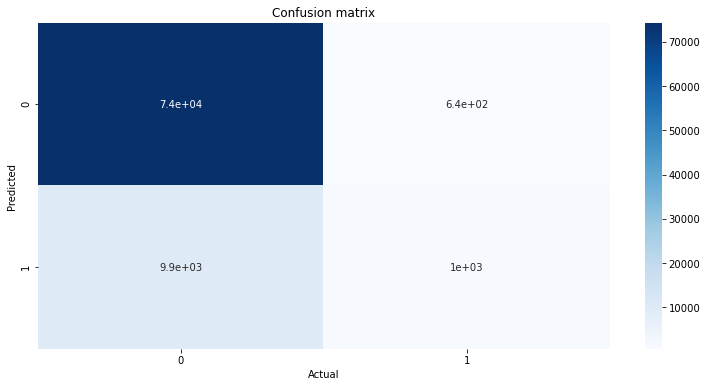

In [261]:
conf_matrix = confusion_matrix(y_test, best_lrc.predict(X_test))
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            cmap="Blues")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()

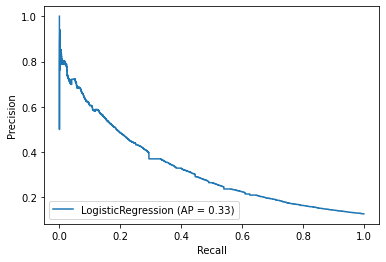

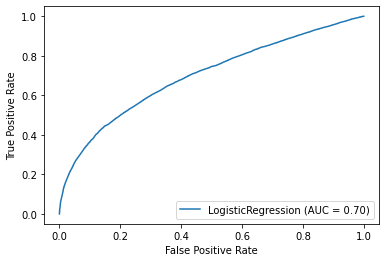

In [267]:
plot_precision_recall_curve(lr, X_test, y_test)

In [280]:
precision, recall, thresholds = precision_recall_curve(y_test, lr.decision_function(X_test))
r = 0.1
1/(1+np.exp(-thresholds[np.argmin(recall > r)]))

0.48577504032693447